# Project 3 - Data Mining - Clustering

# Nội dung:
### 1. Đọc và khám phá dữ liệu

### 2. Chuẩn bị dữ liệu

   - **2.1 Kiểu dữ liệu của các cột**
   - **2.2 Tìm hiểu về sự phân bố của các giá trị trong các cột**
   - **2.3 Đặt câu hỏi và tìm hiểu về các các trường dữ liệu có thể áp dụng thuật toán clustering**
 
### 3. Áp dụng thuật toán k-means cho các thuộc tính có liên quan đến nhau
   - **3.1 Giải thích về các thuật toán áp dụng trong đồ án**
       + **3.1.1 Thuật toán kmeans**
       + **3.1.2 Loại bỏ Outliers**
       + **3.1.3 Phương pháp Elbow tìm số clusster tối ưu**
       + **3.1.4 Phương pháp Silhoutte tìm số cluster tối ưu**
       
   - **3.2 Áp dụng thuật toán k-means để phân nhóm dựa trên Age and Spending score**
   - **3.3 Áp dụng thuật toán k-means để phân nhóm dựa trên Annual Income and Spending Score**
   - **3.4 Áp dụng thuật toán k-means để phân nhóm dựa trên Age, Annual Income and Spending Score**



# 1. Đọc và khám phá dữ liệu

In [1]:
!pip install sklearn
!pip install matplotlib
!pip install plotly
!pip install seaborn

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
import matplotlib
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.cluster as cluster
import plotly as py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=956804aa5d53ebe795244df874a17f82521670950e67e7fcf93d4c3ff555bf04
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Giới thiệu về dữ liệu về tập khách hàng của ngân hàng
- Dữ liệu về tập khách hàng của ngân hàng được lưu vào file ```Mall_Customers.csv```. 
<br>

- Bộ dữ liệu gồm năm cột: 
    + CustomerID: mã số ID duy nhất của mỗi khách hàng.
    + Gender: Giới tính của khách hàng
    + Age: Độ tuổi của khách hàng
    + Annual Income(k$): thể hiện thu nhập hàng năm của khách hàng. (Đơn vị nghìn USD)
    + Spending Score(1-100): điểm tiêm dùng, được chấm dựa theo chi tiêu trong năm của khách hàng. (Đơn vị từ 1-100)
<br> 
    

In [2]:
# Load dữ liệu vào
mall_df = pd.read_csv('Mall_Customers.csv')

- Để có thể có cái nhìn rộng hơn về dữ liệu. Ta có thểm dùng hàm ```sample(10)```, để biểu diễn 10 dòng dữ liệu một cách ngẫu nhiên.

In [3]:
mall_df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
21,22,Male,25,24,73
99,100,Male,20,61,49
76,77,Female,45,54,53
187,188,Male,28,101,68
155,156,Female,27,78,89
175,176,Female,30,88,86
194,195,Female,47,120,16
96,97,Female,47,60,47
41,42,Male,24,38,92
7,8,Female,23,18,94


- Ngoài ra, ta cũng có thể sử dụng lệnh ```pandas.describe()``` được sử dụng để xem một số chi tiết thống kê cơ bản như phân vị, trung bình, std, v.v. của một DataFrame

## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
num_rows,num_cols = mall_df.shape
print('Dữ liệu bao gồm: {} dòng và {} cột'.format(num_rows,num_cols))

Dữ liệu bao gồm: 200 dòng và 5 cột


## Dữ liệu có dòng nào bị lặp không?

In [5]:
have_duplicated_rows = mall_df.duplicated().any()
print(have_duplicated_rows)

False


## Mô tả thống kê của các cột

In [6]:
#Một số mô tả về các cột
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- Một số nhận xét:
    + Về cơ bản, dữ liệu không có gì bất thường.
    + Ta nhìn vào cột count (số điểm dữ liệu). Cả bốn cột đều bằng 200 (kích thước ban đầu của dữ liệu). Có nghĩa là dữ liệu không bị thiếu.

# 2. Chuẩn bị dữ liệu

## 2.1/ Kiểu dữ liệu của các cột

In [7]:
# In ra kiểu dữ liệu của các cột
mall_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

- Như vậy có 4 cột dạng numerical là CustomerID, Age, Annual Income (k$), Spending Score (1-100).
- Có 1 cột dạng object nên ta sẽ in ra kiểu dữ liệu thực sự của nó.

In [8]:
# Xem kiểu dữ liệu của Gender
def open_object_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x : type(x)).unique()
    dtypes = set(a)
    return dtypes

print('Kiểu dữ liệu thực sự của cột Gender: ', open_object_dtype(mall_df['Gender']))
print('Các giá trị có trong cột: ', mall_df['Gender'].unique())

Kiểu dữ liệu thực sự của cột Gender:  {<class 'str'>}
Các giá trị có trong cột:  ['Male' 'Female']


- Kiểu dữ liệu thực sự của cột Gender là string, gồm 2 giá trị là Male và Female.

## 2.2/ Tìm hiểu về sự phân bố của các giá trị trong các cột

### Các cột có dạng numeric: Age, Annual Income và Spending Score

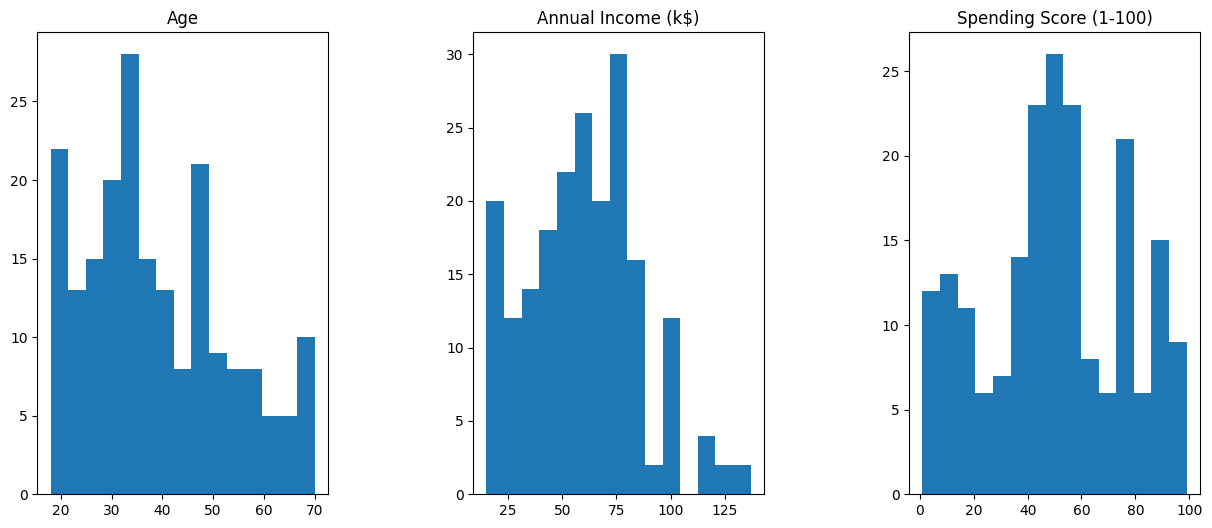

In [9]:
# Trực quan bằng biểu đồ histogram
col_name = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
plt.figure(1 , figsize = (15 , 6))
n = 1
for i in col_name:
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.hist(mall_df[i] , bins = 15)
    plt.title(format(i))
    n += 1
plt.show()

### Nhận xét:
- Cột Age:
    + Dữ liệu tập trung nhiều nhất ở khoảng từ 30 đến 40.
    + Các khoảng còn lại đều có số lượng điểm dữ liệu ở mức tương đối.
    + Không tìm thấy điểm outlier trong cột Age.
- Cột Annual Income(k$):
    + Dữ liệu tập trung nhiều nhất ở khoảng từ 60 đến 80.
    + Ở đây có thể có 1 số điểm ngoại lai khi chỉ số Annual Income vượt qua 100.
- Cột Spending Score:
    + Các giá trị xuất hiện nhiều nhất là khoảng từ 40 đến 60.
    + Nhìn chung không có điều gì bất thường, cũng như không có điểm outlier trong cột này.

### Cột có dạng categorical: Gender

{'Male': 88, 'Female': 112}


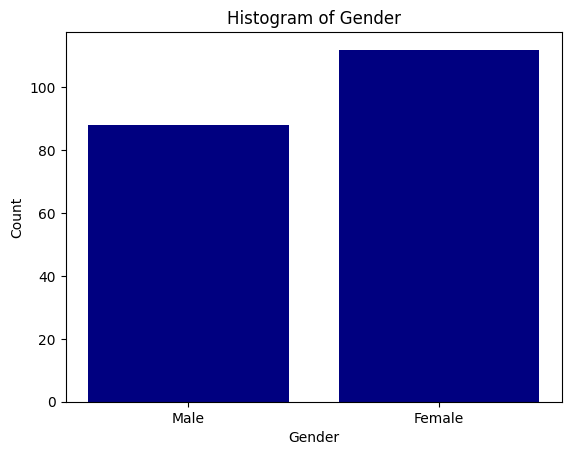

In [10]:
#Lọc dữ liệu
mydict ={}
for i in mall_df['Gender']:
    mydict[i] = mydict.get(i,0) + 1
diff = list(mydict.keys())
val = list(mydict.values())

#Trực quan
plt.bar(diff,val,color='navy')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Histogram of Gender")
print(mydict)

### Nhận xét:
- Số lượng giới tính nam là 88 và số lượng giới tính nữ 112.
- Ở đây ta nhận thấy tỉ lệ giới tính nữ cao hơn một chút so với tính nam khoảng 20 người.

## 2.3/ Đặt câu hỏi và tìm hiểu về các các trường dữ liệu có thể áp dụng thuật toán clustering

### Câu 1: Điểm tiêu dùng ở các nhóm khách hàng sử dụng dịch vụ thuộc các độ tuổi khác nhau có sự khác biệt gì với nhau hay không? 

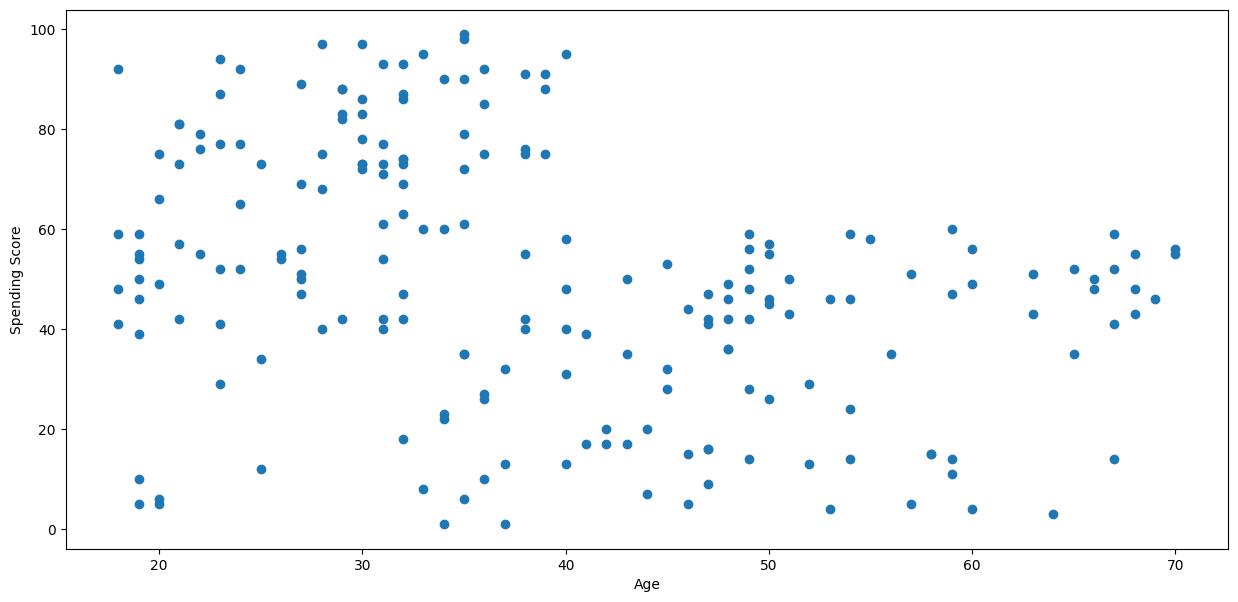

In [11]:
#Trực quan với biểu đồ scatter
plt.figure(1 , figsize = (15 , 7))
plt.scatter(x = 'Age' , y = 'Spending Score (1-100)' , data = mall_df)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### Nhận xét:
- Mặc dù các nhóm không thể hiện rõ nhưng có thể phân nhóm được dựa trên 2 yếu tố này.
- Không tìm thấy các điểm outlier do các điểm dữ liệu trải đều ở cả Age lẫn Spending Score.
- Ta có thể dựa vào các nhóm này để giúp cho công ty có những chính sách ưu đãi cho từng nhóm khách hàng cụ thể nhằm khuyến khích khách hàng mua hàng nhiều hơn.
- Với từng nhóm cụ thể ta có thể cử những nhóm quản lý khác nhau để có những nắm bắt nhu cầu tiêu dùng.

### Câu 2: Liệu ta có thể chia các nhóm khách hàng theo thu nhập và điểm tiêu dùng hay không?

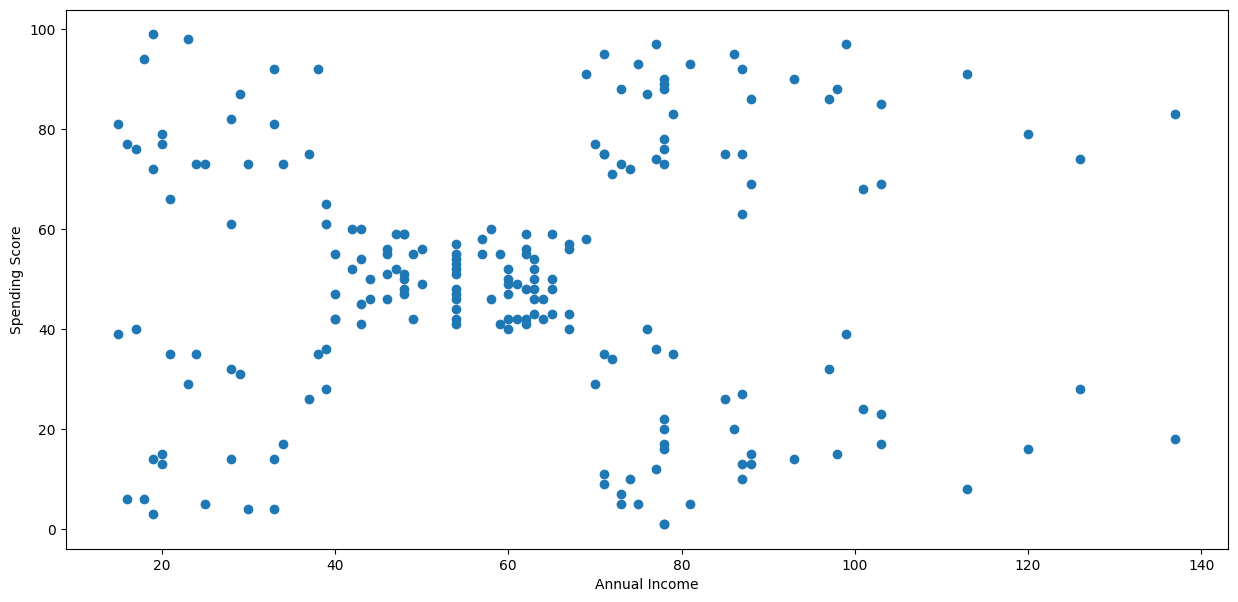

In [12]:
#Trực quan với biểu đồ scatter
plt.figure(1 , figsize = (15 , 7))
plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = mall_df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Nhận xét:
- Các nhóm thể hiện khá rõ trên biểu đồ và tất nhiên ta có thể áp dụng thuật toán k-means cho 2 biến này.
- Với các nhóm sau khi chia được, ta có thể dựa vào thu nhập cũng như khả năng tiêu dùng của khách hàng để đề xuất các mặt hàng tương ứng cũng như có các chiến lược riêng để kích thích tiêu dùng.
- Các nhân viên cũng có thể dễ dàng quan sát trong các nhóm khách hàng nhỏ để đưa ra các kế hoạch phát triển việc bán hàng trong tương lai.

## Câu 3: Liệu có khả quan khi ta thực hiện chia các nhóm khách hàng dựa theo cả 3 tiêu chí Age, Annual Income và Spending Score

In [13]:
#Trực quan với biểu đồ scatter 3D
scatter = go.Scatter3d(
    x = mall_df['Annual Income (k$)'],
    y = mall_df['Age'],
    z = mall_df['Spending Score (1-100)'],
    mode='markers')

layout = go.Layout(
    title= 'Gom nhóm theo 3 biến Age & Annual Income & Spending Score',
    scene = dict(
            xaxis = dict(title  = 'Annual Income'),
            yaxis = dict(title  = 'Age'),
            zaxis = dict(title  = 'Spending Score')
        )
)
fig = go.Figure(data=[scatter], layout=layout)
py.offline.iplot(fig)

### Nhận xét:
- Dựa vào biểu đồ ta có thể thấy có ít nhất 5 nhóm có thể chia nên ta có thể áp dụng thuật toán k-means cho 3 biến này.
- Với việc gom nhóm theo cả 3 thuộc tính là tuổi, thu nhập và điểm tiêu thụ, ta có thể biết tổng quan và cụ thể các nhóm khách hàng mà công ty đang có ở cả 3 tiêu chí.
- Điều này sẽ cung cấp cho các nhân viên cái nhìn tổng quan về các nhóm khách hàng từ đó đưa ra chiến lược chung và lâu dài cho công ty.

# 3. Áp dụng thuật toán k-means cho các thuộc tính có liên quan đến nhau

## 3.1/ Giải thích về các thuật toán áp dụng trong đồ án:

### 3.1.1/ Thuật toán kmeans:
- Thuật toán k-means dùng để phân cụm các nhóm khách hàng dựa trên các thuộc tính hay nói cách khác là các cột dữ liệu mà ta đưa vào. Trong đồ án này, ta sẽ sử dụng thư việc sklearn để chạy thuật toán kmeans.
- Các bước thực hiện thuật toán:
    + Bước 1: chọn ngẫu nhiên k điểm dữ liệu làm điểm trung tâm (centroids).
    + Bước 2: tính khoảng cách (Euclidean), giữa tất cả các điểm dữ liệu và các điểm trung tâm. 
    + Bước 3: gán mỗi điểm dữ liệu cho tâm gần nhất theo khoảng cách tìm được.
    + Bước 4: cập nhật vị trí trung tâm bằng cách lấy giá trị trung bình của các điểm trong mỗi nhóm cụm.
    + Bước 5: lặp lại từ Bước 2 đến Bước 4 cho đến khi các điểm trung tâm không thay đổi.


### 3.1.2/ Loại bỏ outlier:
- Sau khi biểu diễn dữ liệu, có vẻ ta thấy dữ liệu có vài điểm có giá trị Annual Income cao bất thường và nằm khá xa so với phần lớn dữ liệu.
![image-3.png](attachment:image-3.png)
- Ta sẽ loại bỏ các điểm dữ liệu này

- Phương pháp loại bỏ:

- Ta sẽ sử dụng kỹ thuật "Inter-Quartile Range Method" để tìm ra các điểm dữ liệu ngoại lai.
- Inter-Quartile Range (được viết tắt là IQR). IQR được tính bằng công thức 

$$
IQR = Q3 - Q1
$$

- Trong đó:
    + Q1: được gọi là 'first quartile' của dữ liệu. Nói cách khác, 25% dữ liệu, sẽ nhỏ hơn Q1.
    + Q3: được gọi là 'third quartile' của dữ liệu. Nói cách khác, 75% dữ liệu, sẽ nhỏ hơn Q3.
    
- Ta định nghĩa phạm vi quyết định (decision range), với công thức:
    + Giới hạn dưới: $ Q1 - 1.5 * IQR $
    + Giới hạn trên: $ Q3 + 1.5 * IQR $
    
- Các điểm dữ liệu nằm ngoài giới hạn dưới và giới hạn trên, được xem là điểm dữ liệu ngoại lai.

- Tài liệu tham khảo: $ Lab4-kmeans $


### 3.1.3/ Phương pháp Elbow tìm số clusster tối ưu:
- Phương thức elbow chạy thuật toán K-means trên tập dữ liệu cho một phạm vi các giá trị k ở đây ta sẽ chạy từ 1 đến 10).
- Ta sẽ thực hiện thuật toán K-means với tất cả các giá trị từ 1 đến 10 của k. Với mỗi giá trị k, ta sẽ tính khoảng cách trung bình đến tâm cho tất cả các điểm dữ liệu.
- Vẽ đồ thị các điểm này ứng với giá trị k và tìm vị trí mà khoảng cách trung bình từ trung tâm giảm đột ngột (đó còn gọi là điểm “Khuỷu tay”).
![image-2.png](attachment:image-2.png)
- Như hình ảnh trên: điểm tương ứng với 'Khuỷu tay' mà ta đã nói ở trên là k = 4. Cũng là số cluser tối ưu cho thuật toán.

- Tài liệu tham khảo: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/ 

### 3.1.4/ Phương pháp Silhoutte tìm số clusster tối ưu:
- Hệ số Silhoutte là thước đo mức độ tương tự của một điểm dữ liệu trong một cluster so với các cluster khác.
- Ta sẽ chọn một dải giá trị của k (ở đây ta sẽ chọn từ 2 đến 11).
- Sau đó vẽ đồ thị silhoutte cho mỗi giá trị của K.
- Phương trình tính toán hệ số Silhoutte cho một điểm dữ liệu:
![image.png](attachment:image.png)

    + S(i) là hệ số Silhoutte của điểm dữ liệu i.
    + a(i) là khoảng cách trung bình giữa i và tất cả các điểm dữ liệu khác trong cluster mà nó thuộc về.
    + b(i) là khoảng cách trung bình từ i đến tất cả các cụm mà nó không thuộc về.
    
    
- Sau đó, ta sẽ tính toán trung bình silhouette cho mọi k:
![image-2.png](attachment:image-2.png)
- Trực quan các giá trị trung bình silhoutte và k. Sau đó chọn ra giá trị lớn nhất của silhoutte và chiếu xuống k, đó chính là số cluster tối ưu cần tìm.
- Ví dụ về trực quan các giá trị trung bình silhoutte:
![image-3.png](attachment:image-3.png)
- Như vậy, ở đây 4 là số cluster cần tìm.
- Tài liệu tham khảo: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/    


## 3.2/ Áp dụng thuật toán k-means để phân nhóm dựa trên Age and Spending score

### Lọc ra cột Age, Spending Score (1-100)

In [14]:
'''Age and spending Score'''
X1 = mall_df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

### Tìm ra số cluster bằng phương pháp Elbow

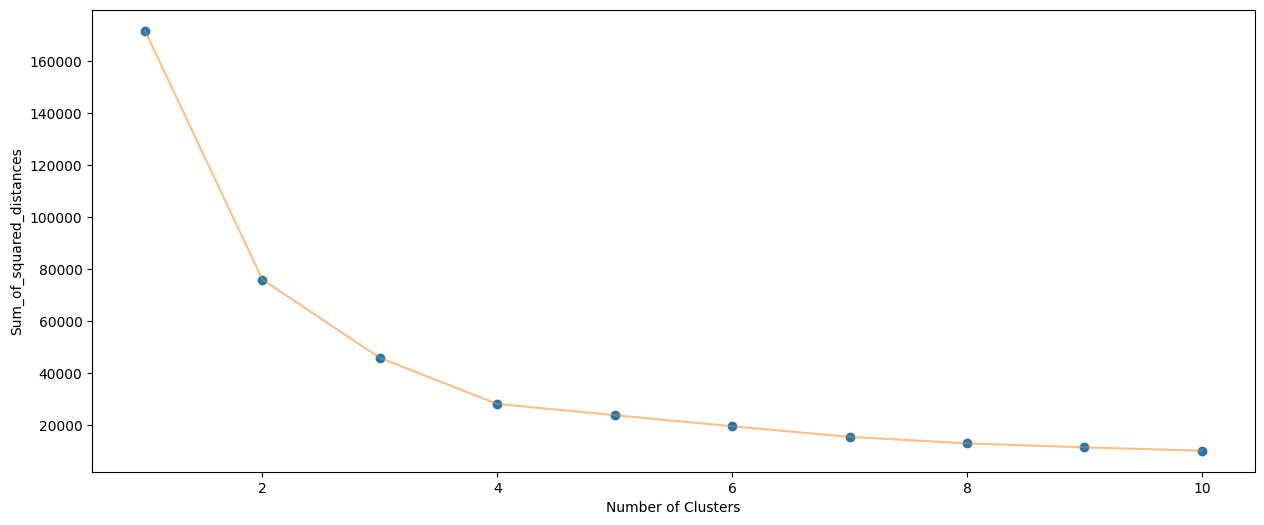

In [15]:
# Tìm ra số cluster bằng phương pháp Elbow
distance = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    distance.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , distance , 'o')
plt.plot(np.arange(1 , 11) , distance , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Sum_of_squared_distances')
plt.show()

### Tìm ra số cluster bằng phương pháp silhoutte

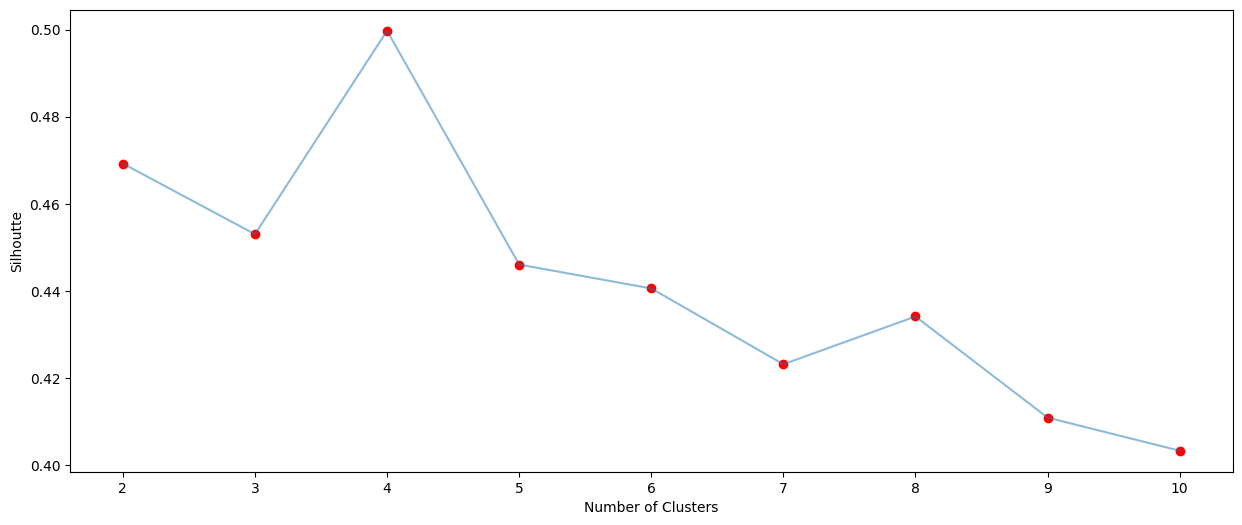

In [16]:
# Tìm ra số cluster bằng phương pháp silhoutte
silhouette = []
for i in range(2,11):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X1).labels_
    
    silhouette.append(metrics.silhouette_score(X1,labels,metric="euclidean",sample_size=1000,random_state=200))
    

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , silhouette , 'o',color = 'red')
plt.plot(np.arange(2 , 11) , silhouette , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhoutte')
plt.show()

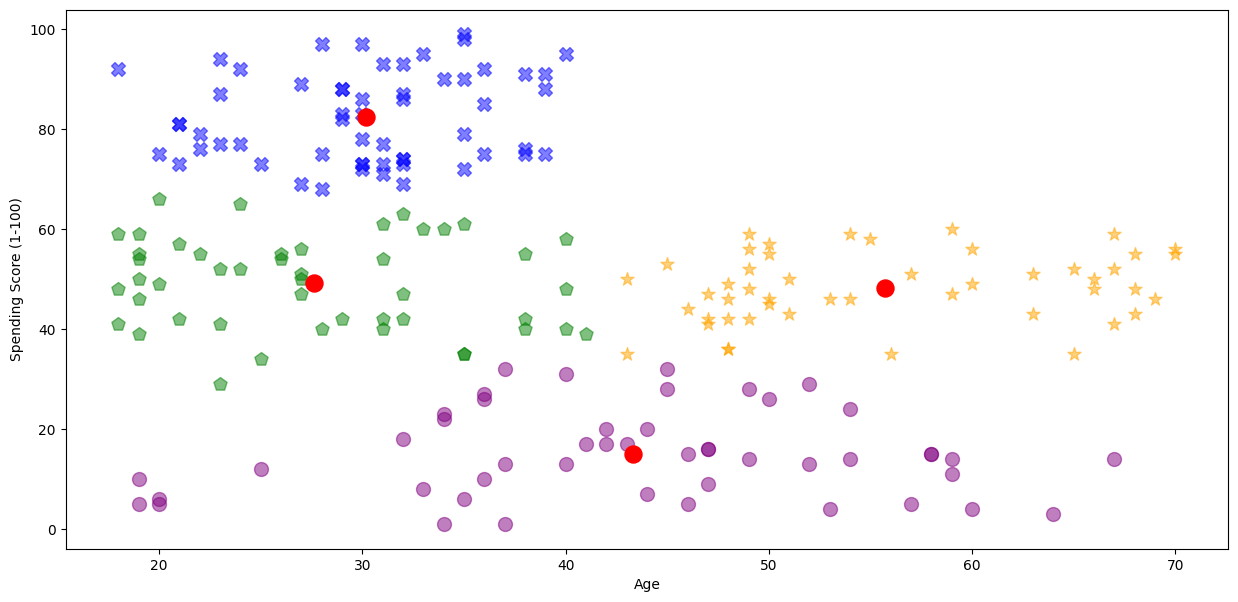

In [17]:
# Áp dụng thuật toán k-means để phân nhóm
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
#labels1 là mảng chứa nhãn cluster của các điểm dữ liệu
labels1 = algorithm.labels_
#centroids là tọa độ tâm cluster
centroids1 = algorithm.cluster_centers_

# Trực quan kết quả phân nhóm
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
def assign_marker(X):
    switch={
                0:'p',
                1:'o',
                2:'X',
                3:'*',
                4:'s',
                5:'v',
             }
    marker = switch.get(X)
    return marker

def assign_color(X):
    switch={
                0:'green',
                1:'purple',
                2:'blue',
                3:'orange',
                4:'yellow',
                5:'cyan'
             }
    col = switch.get(X)
    return col

for i in range(len(mall_df['Age'])):
    plt.scatter(mall_df["Age"][i],mall_df["Spending Score (1-100)"][i],
                c = assign_color(labels1[i]),
                marker = assign_marker(labels1[i]),alpha = 0.5,s = 100)


#In trung tâm
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 150 , c = 'red' , alpha = 1)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### Nhận xét:
- Nhóm thứ nhất: điểm tiêu dùng từ 0 đến 25 trải đều ở tất cả độ tuổi.
- Điểm tiêu dùng từ 30 đến 65 thì có thể chia ra làm 2 nhóm:
    + Nhóm thứ hai có độ tuổi trẻ hơn từ 18 đến 40.
    + Nhóm thứ ba có độ tuổi trẻ hơn từ 45 đến 70.
- Nhóm cuối cùng có điểm tiêu dùng cao nhất từ 70 đến 100 thì có độ tuổi còn khá nhỏ từ 18 đến 40.

## 3.3/ Áp dụng thuật toán k-means để phân nhóm dựa trên Annual Income and Spending Score

### Tiền xử lý

In [18]:
#Loại bỏ outlier ở cột Annual Income
q1_annual = round(np.quantile(mall_df['Annual Income (k$)'], 0.25))
q3_annual = round(np.quantile(mall_df['Annual Income (k$)'], 0.75))
iqr_annual = q3_annual - q1_annual

lower = q1_annual - 1.5 * iqr_annual
upper = q3_annual + 1.5 * iqr_annual
temp = mall_df.loc[(mall_df['Annual Income (k$)'] < lower) | (mall_df['Annual Income (k$)'] > upper)]
outlier_annual_list = list(temp.index)
print('Outlier index: ', outlier_annual_list)

second_df = mall_df.drop(outlier_annual_list)
print('Drop outlier completed!')

Outlier index:  [198, 199]
Drop outlier completed!


### Lọc ra cột Annual Income, Spending Score

In [19]:
'''Annual Income and spending Score'''
X2 = second_df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

### Tìm ra số cluster bằng phương pháp Elbow

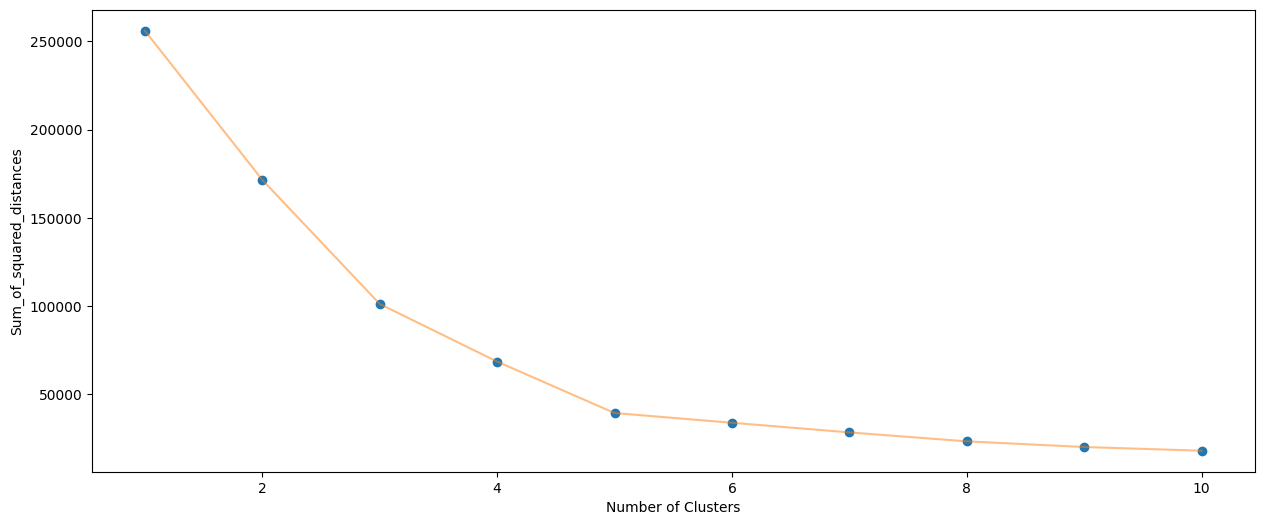

In [20]:
# Tìm ra số cluster bằng phương pháp Elbow
distance = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    distance.append(algorithm.inertia_)

    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , distance , 'o')
plt.plot(np.arange(1 , 11) , distance , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Sum_of_squared_distances')
plt.show()

### Tìm ra số cluster bằng phương pháp silhoutte

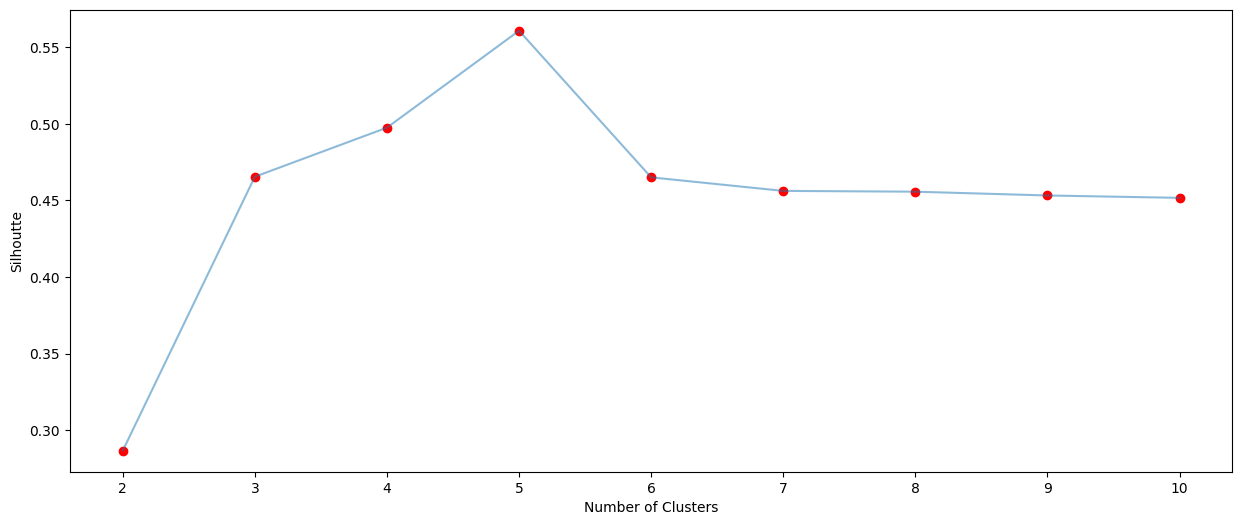

In [21]:
# Tìm ra số cluster bằng phương pháp silhoutte
silhouette = []
for i in range(2,11):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X2).labels_
    silhouette.append(metrics.silhouette_score(X2,labels,metric="euclidean",sample_size=1000,random_state=200))

#Trực quan với biểu đồ
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , silhouette , 'o',color ='red')
plt.plot(np.arange(2 , 11) , silhouette , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhoutte')
plt.show()

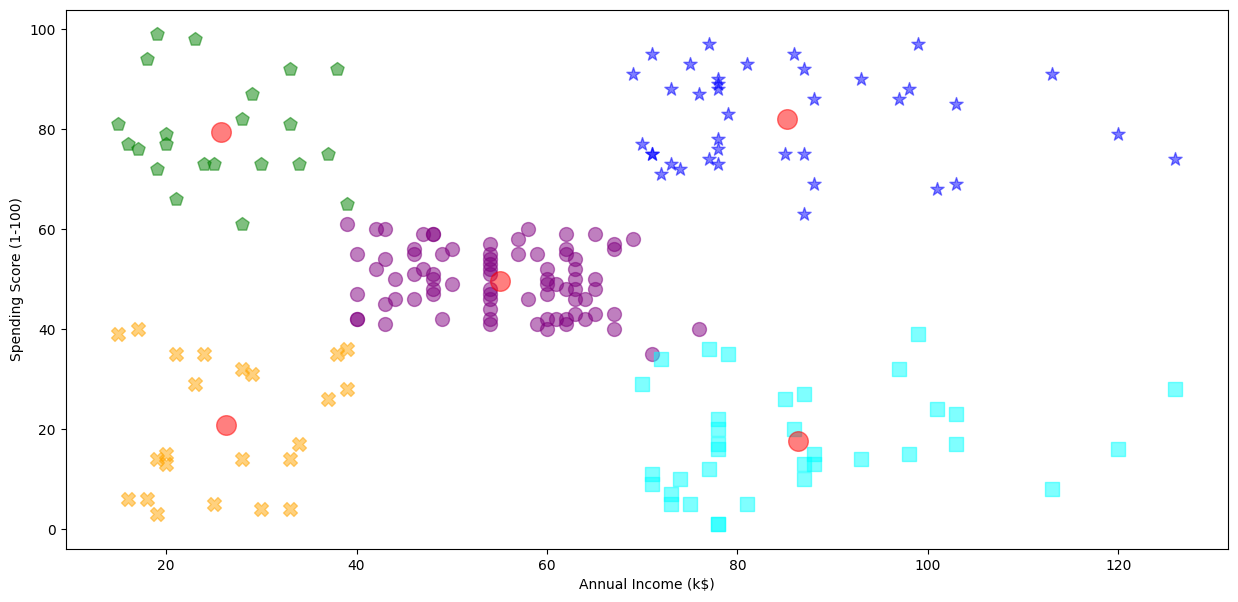

In [22]:
# Cài đặt thuật toán K-means
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
#Nhãn nhóm của điểm dữ liệu
labels2 = algorithm.labels_
#Tọa độ tâm
centroids2 = algorithm.cluster_centers_

# Trực quan các cluster
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
def assign_marker(X):
    switch={
                0:'p',
                1:'o',
                2:'X',
                3:'*',
                4:'s',
                5:'v',
             }
    marker = switch.get(X)
    return marker

def assign_color(X):
    switch={
                0:'green',
                1:'purple',
                2:'orange',
                3:'blue',
                4:'cyan',
                5:'yellow'
             }
    col = switch.get(X)
    return col

for i in range(len(second_df['Annual Income (k$)'])):
    plt.scatter(second_df["Annual Income (k$)"][i],mall_df["Spending Score (1-100)"][i],
                c = assign_color(labels2[i]),
                marker = assign_marker(labels2[i]),alpha = 0.5,s = 100)

plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### Nhận xét:
- Hai nhóm đầu tiên có điểm tiêu dùng từ 0 đến 40:
    + Nhóm thứ nhất có thu nhập từ 15 đến 40.
    + Nhóm thứ hai có thu nhập từ khoảng 70 đến 140.
- Nhóm thứ ba: thu nhập vào khoảng 40 đến 80 và điểm tiêu dùng ở mức từ 40 đến 60.
- Hai nhóm cuối cùng có cùng điểm tiêu dùng từ 60 đến 100:
    + Nhóm thứ tư có thu nhập từ 14 đến 40.
    + Nhóm thứ năm có thu nhập từ 70 đến 140.

## 3.4/ Áp dụng thuật toán k-means để phân nhóm dựa trên Age, Annual Income and Spending Score

### Tiền xử lý

In [23]:
#Loại bỏ outlier ở cột Annual Income
q1_annual = round(np.quantile(mall_df['Annual Income (k$)'], 0.25))
q3_annual = round(np.quantile(mall_df['Annual Income (k$)'], 0.75))
iqr_annual = q3_annual - q1_annual

lower = q1_annual - 1.5 * iqr_annual
upper = q3_annual + 1.5 * iqr_annual
temp = mall_df.loc[(mall_df['Annual Income (k$)'] < lower) | (mall_df['Annual Income (k$)'] > upper)]
outlier_annual_list = list(temp.index)
print('Outlier index: ', outlier_annual_list)

second_df = mall_df.drop(outlier_annual_list)
print('Drop outlier completed!')

Outlier index:  [198, 199]
Drop outlier completed!


### Tìm ra số cluster bằng phương pháp Elbow

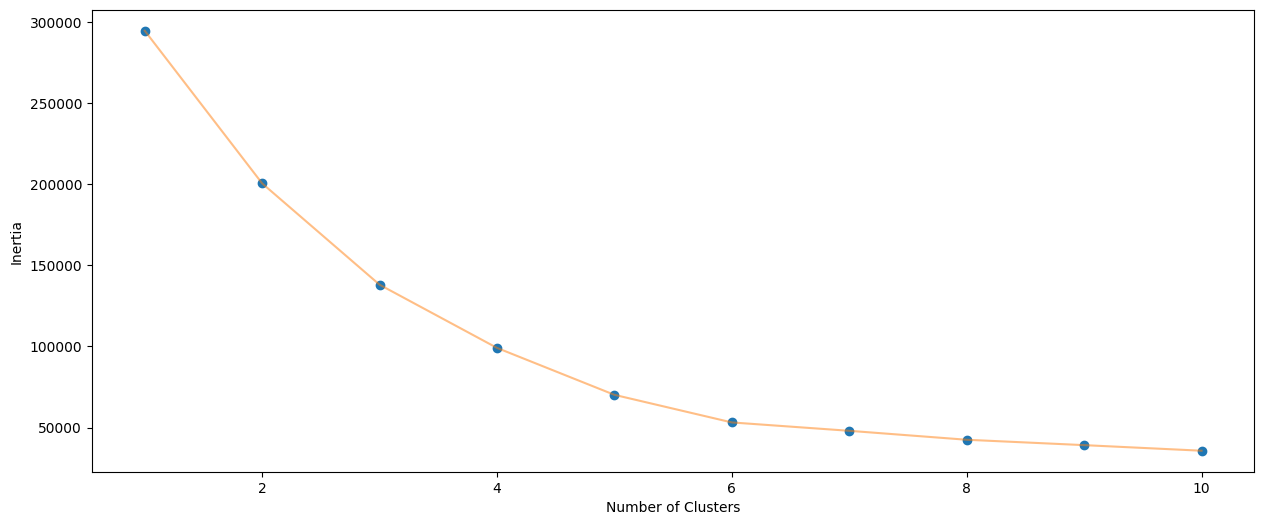

In [24]:
X3 = second_df[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values

distance = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    distance.append(algorithm.inertia_)
    
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , distance , 'o')
plt.plot(np.arange(1 , 11) , distance , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()




### Tìm ra số cluster bằng phương pháp silhoutte

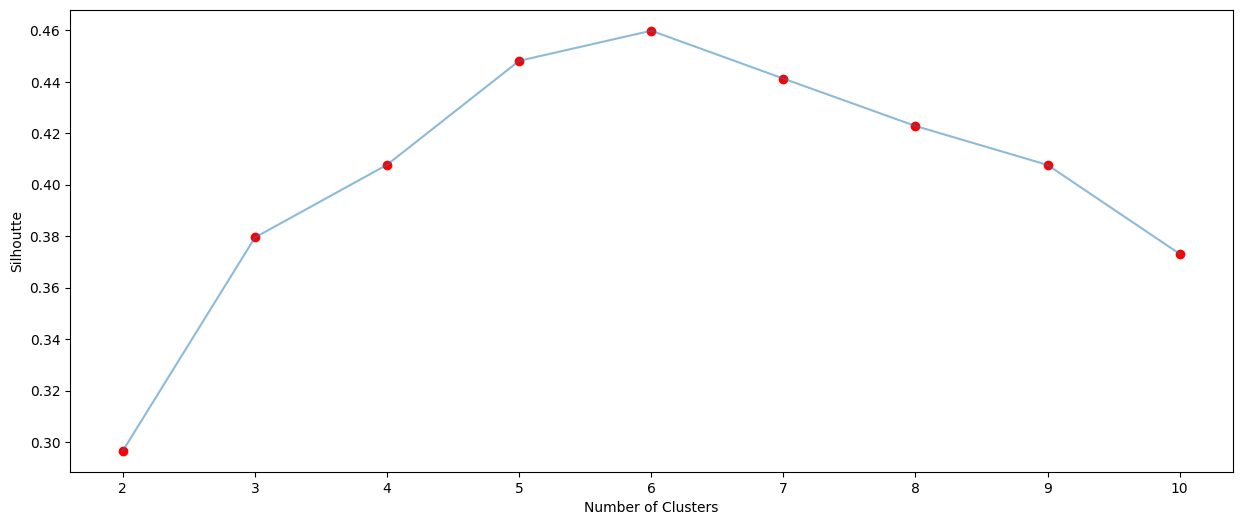

In [25]:
silhouette = []
for i in range(2,11):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X3).labels_
    silhouette.append(metrics.silhouette_score(X3,labels,metric="euclidean",sample_size=1000,random_state=200))

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , silhouette , 'o',color ='red')
plt.plot(np.arange(2 , 11) , silhouette , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhoutte')
plt.show()

In [26]:
# Cài đặt thuật toán k-means
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
#Nhãn nhóm của các điểm dữ liệu
labels3 = algorithm.labels_
#Tọa độ tâm của các cluster
centroids3 = algorithm.cluster_centers_

# Trực quan các nhóm sau khi chạy thuật toán
second_df['label3'] =  labels3
scatter = go.Scatter3d(
    x= second_df['Annual Income (k$)'],
    y= second_df['Age'],
    z= second_df['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        color = second_df['label3'], 
        size= 15,
        opacity=0.8
     )
)

layout = go.Layout(
    title= 'Gom nhóm theo 3 biến Age & Annual Income & Spending Score',
    scene = dict(
            xaxis = dict(title  = 'Annual Income'),
            yaxis = dict(title  = 'Age'),
            zaxis = dict(title  = 'Spending Score')
        )
)
fig = go.Figure(data=[scatter], layout=layout)
py.offline.iplot(fig)

### Nhận xét:
- Do trong không gian 3 chiều nên tương đối khó để nhận diện khoảng giá trị của các nhóm nên ở đây ta sẽ gọi tên các nhóm qua các điểm trung tâm:
    + Nhóm 1: Lấy trung tâm là độ tuổi 27, mức thu nhập là khoảng 56.57, và điểm tiêu thụ là 49.13.
    + Nhóm 2: Lấy trung tâm là độ tuổi 56, mức thu nhập là khoảng 53.37, và điểm tiêu thụ là 49.08.
    + Nhóm 3: Lấy trung tâm là độ tuổi 42, mức thu nhập là khoảng 86.79, và điểm tiêu thụ là 17.26.
    + Nhóm 4: Lấy trung tâm là độ tuổi 25, mức thu nhập là khoảng 25.72, và điểm tiêu thụ là 79.36.
    + Nhóm 5: Lấy trung tâm là độ tuổi 33, mức thu nhập là khoảng 85.21, và điểm tiêu thụ là 82.11.
    + Nhóm 6: Lấy trung tâm là độ tuổi 44, mức thu nhập là khoảng 25.14, và điểm tiêu thụ là 19.52.
    